In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path=r"C:\Users\janas\Desktop\PROJ_HCI\SplitDataset\train"
test_path=r"C:\Users\janas\Desktop\PROJ_HCI\SplitDataset\test"
val_path=r"C:\Users\janas\Desktop\PROJ_HCI\SplitDataset\val"

In [ ]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [ ]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [ ]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3024 images belonging to 27 classes.
Found 378 images belonging to 27 classes.
Found 378 images belonging to 27 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'znone': 26}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((3024,), (378,), (378,))

In [ ]:
vgg = VGG19(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(27, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [2]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)


Epoch 1/10
94/94 [==============================] - 555s 6s/step - loss: 1.0233 - accuracy: 0.6504 - val_loss: 0.8427 - val_accuracy: 0.7158
Epoch 2/10
94/94 [==============================] - 549s 6s/step - loss: 0.7453 - accuracy: 0.7452 - val_loss: 0.6553 - val_accuracy: 0.7855
Epoch 3/10
94/94 [==============================] - 390s 6s/step - loss: 0.5819 - accuracy: 0.7604 - val_loss: 0.6621 - val_accuracy: 0.8002
Epoch 4/10
94/94 [==============================] - 374s 6s/step - loss: 0.4747 - accuracy: 0.7950 - val_loss: 0.5576 - val_accuracy: 0.8203
Epoch 5/10
94/94 [==============================] - 366s 6s/step - loss: 0.4985 - accuracy: 0.8358 - val_loss: 0.4449 - val_accuracy: 0.8452
Epoch 6/10
94/94 [==============================] - 362s 6s/step - loss: 0.3435 - accuracy: 0.8851 - val_loss: 0.3286 - val_accuracy: 0.8430
Epoch 7/10
94/94 [==============================] - 377s 6s/step - loss: 0.3004 - accuracy: 0.9000 - val_loss: 0.2922 - val_accuracy: 0.8809
Epoch 8/10
94

In [ ]:
model.save("hack36.h5")

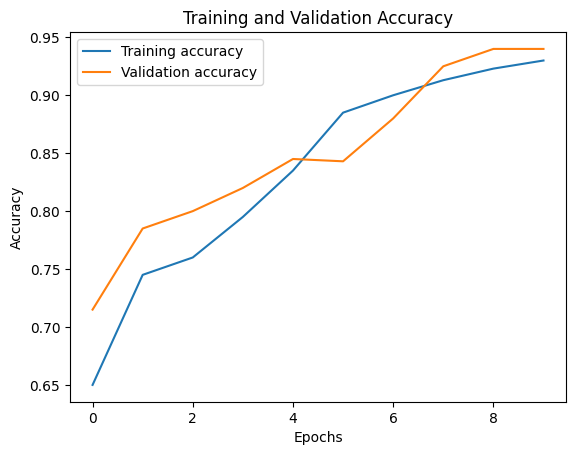

In [27]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('vgg-acc.png')
plt.show()

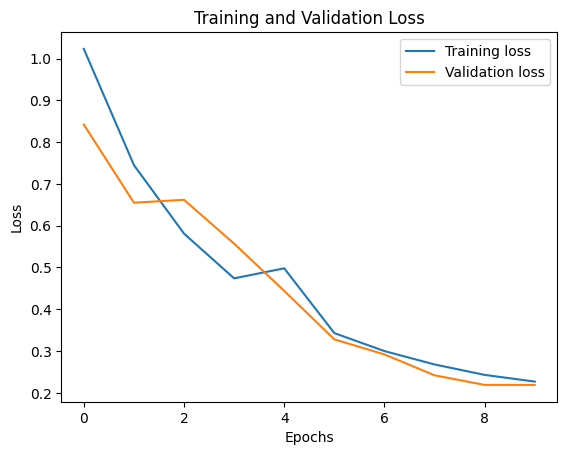

In [36]:
plt.plot(history['loss'], label='Training loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('vgg-loss.png')
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

12/12 [==============================] - 107s 9s/step


In [40]:
#get classification report
print(classification_report(y_pred,test_y))


              precision    recall  f1-score   support

           0       0.95      0.90      0.92        14
           1       0.98      0.99      0.98        14
           2       0.85      0.93      0.89        14
           3       0.97      0.97      0.97        14
           4       0.89      0.94      0.91        14
           5       0.98      0.86      0.92        14
           6       0.96      0.86      0.91        15
           7       0.97      0.93      0.95        14
           8       0.91      1.00      0.95        14
           9       0.93      1.00      0.97        14
          10       0.82      0.79      0.81        19
          11       0.94      0.94      0.94        14
          12       0.94      0.81      0.87        16
          13       0.90      0.90      0.90        15
          14       1.00      1.00      1.00        14
          15       0.87      1.00      0.93        13
          16       0.92      0.79      0.85        14
          17       0.88    

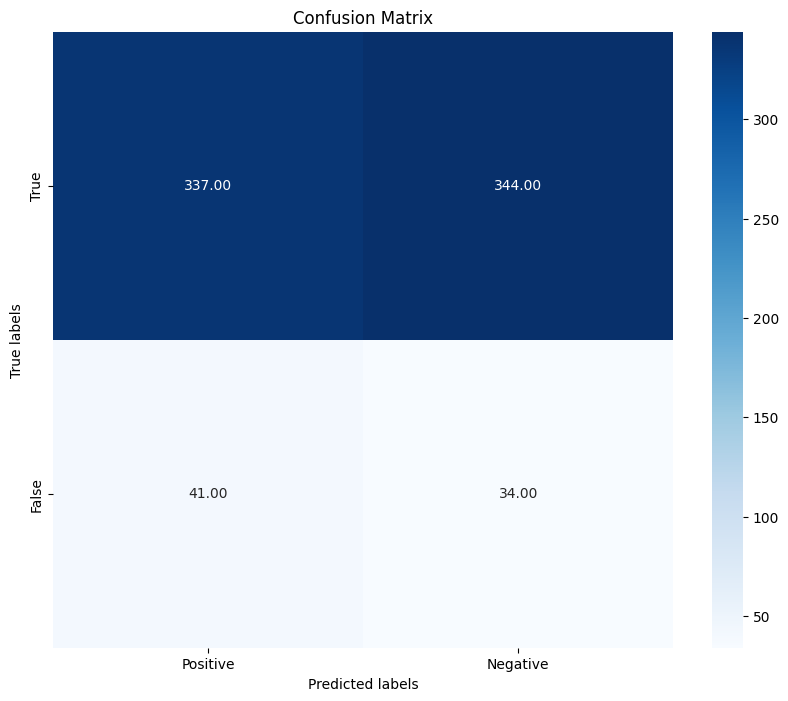

In [1]:

import seaborn as sns
confusion_matrix1 = confusion_matrix(y_pred,test_y)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix1.sum(axis=0), annot=True, fmt=".2f", cmap="Blues", xticklabels=['Positive', 'Negative'], yticklabels=['True', 'False'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

